In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs

/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs


In [ ]:
pwd

'/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs'

# This code is for Generating mask of an Image

In [ ]:
# Minimum requirement for Generating masking of an image using detectron model

!pip install pyyaml==5.1
!pip install tensorflow tensorflow-gpu
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

     |████████████████████████████████| 276kB 3.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=b2e63c68e3a7de844b5517aef813c23d92e5b0c6ec0ac57e7c0935bdedc1421d
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 454.3MB 33kB/s 
     |████████████████████████████████| 1.2MB 22.9MB/s 
ERROR: tensorflow-gpu 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow-gpu 2.5.0 has requirement grpcio~=1.34.0, but you'll have grpcio 1.32.0 which is incompatible.
ERROR: tensorflow-gpu 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow-gpu 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 w

*Rename files in current project*

In [ ]:
cnt_img_dir = "./NFTs/Input_1/"
Bk_style_dir = "./NFTs/style_1/Bk_style/"
Fg_style_dir = "./NFTs/style_1/Fg_style/"
temp_dir = "./NFTs/temp/"
result_dir = "./NFTs/result_1/"

In [ ]:
!python rename_files.py "{cnt_img_dir}" "{Bk_style_dir}" "{Fg_style_dir}" "{temp_dir}"

Renamed all files which is mentioned in cnt_img, bk_style, fg_style !!!!


In [ ]:
cd /content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/MOD

/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/MOD


In [ ]:
import os

# clone the repository
# %cd /content
if not os.path.exists('MODNet'):
  !git clone https://github.com/ZHKKKe/MODNet
%cd MODNet/

# dowload the pre-trained ckpt for image matting
pretrained_ckpt = 'pretrained/modnet_photographic_portrait_matting.ckpt'
if not os.path.exists(pretrained_ckpt):
  !gdown --id 1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz \
          -O pretrained/modnet_photographic_portrait_matting.ckpt

/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/MOD/MODNet


In [ ]:
# import shutil
# from google.colab import files

# # clean and rebuild the image folders
# input_folder = '/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_1'
# if os.path.exists(input_folder):
#   shutil.rmtree(input_folder)
# os.makedirs(input_folder)

# output_folder = '/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_1'
# if os.path.exists(output_folder):
#   shutil.rmtree(output_folder)
# os.makedirs(output_folder)

# # upload images (PNG or JPG)
# image_names = list(files.upload().keys())
# for image_name in image_names:
#   shutil.move(image_name, os.path.join(input_folder, image_name))


Saving 2094.jpg to 2094.jpg


In [ ]:
!python -m demo.image_matting.colab.inference \
        --input-path /content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_1 \
        --output-path /content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_2 \
        --ckpt-path ./pretrained/modnet_photographic_portrait_matting.ckpt


Process image: 2081.jpg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
Process image: 1.png
Process image: 2.png
Process image: 3.png
Process image: 4.png
Process image: 5.png
Process image: 6.png


<class 'PIL.Image.Image'>


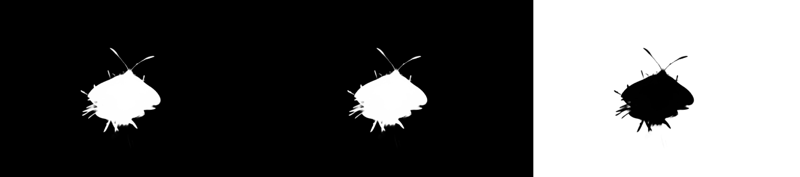

1.png 

<class 'PIL.Image.Image'>


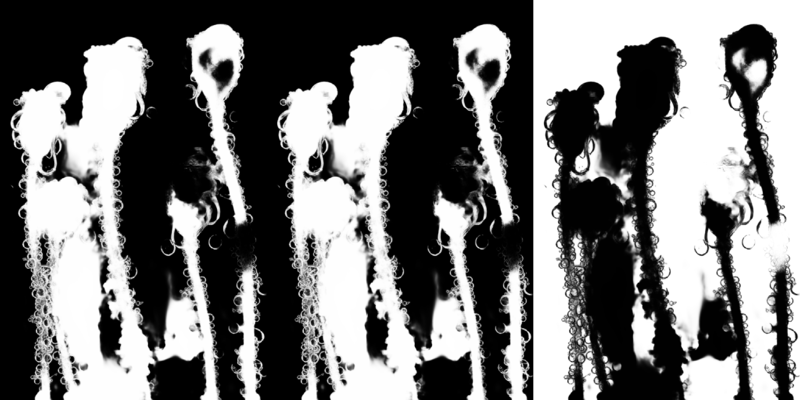

2.png 

<class 'PIL.Image.Image'>


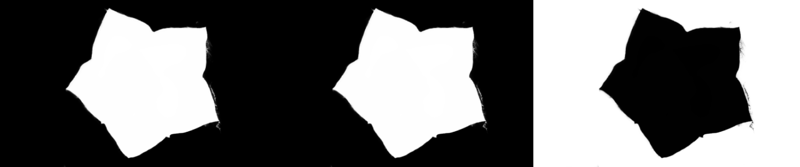

3.png 

<class 'PIL.Image.Image'>


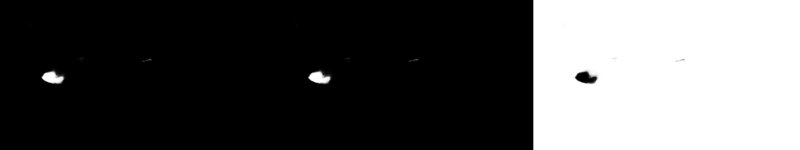

4.png 

<class 'PIL.Image.Image'>


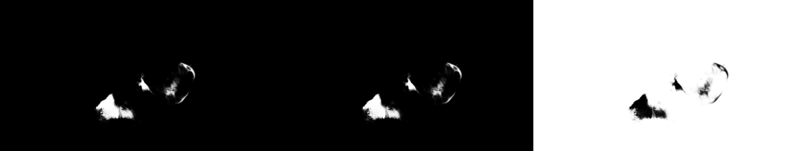

5.png 

<class 'PIL.Image.Image'>


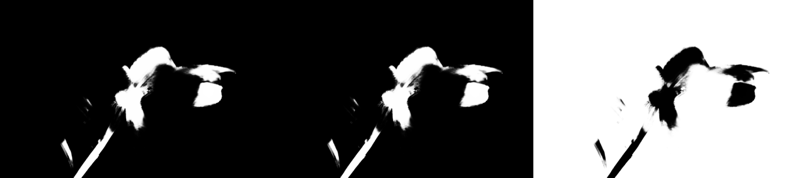

6.png 



IsADirectoryError: ignored

In [ ]:
import numpy as np
from PIL import Image
import cv2

def combined_display(image, matte,img_orig):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))
  
  # obtain predicted foreground
  image = np.asarray(image)
  if len(image.shape) == 2:
    image = image[:, :, None]
  if image.shape[2] == 1:
    image = np.repeat(image, 3, axis=2)
  elif image.shape[2] == 4:
    image = image[:, :, 0:3]
  matte_inv = np.repeat(np.invert(matte)[:, :, None], 3, axis=2) / 255 
  matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
  
  bk_img = Image.fromarray(np.uint8(matte * 255))
  fr_img = Image.fromarray(np.uint8(matte_inv * 255))
  print(type(bk_img))
  bk_img.save(f'/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_1/{img_orig}_bk.png',"PNG")
  fr_img.save(f'/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_1/{img_orig}_fg.png',"PNG")

  # foreground = image * matte + np.full(image.shape, 255) * (1 - matte)
  # background= image * matte_inv + np.full(image.shape, 255) * (  matte_inv )
  
  # combine image, foreground, and alpha into one line
  # combined = np.concatenate((image, foreground, matte * 255, background, matte_inv*255), axis=1)
  combined = np.concatenate((image,  matte * 255, matte_inv*255), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined

# visualize all images
input_folder= "/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_2/"
output_folder="/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/NFTs/Input_2"
image_names = os.listdir(input_folder)

for image_name in image_names:

  matte_name = image_name.split('.')[0] + '.png'
  img_orig = image_name.split('.')[0]
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(output_folder, matte_name))
  display(combined_display(image, matte,img_orig))
  print(image_name, '\n')


In [ ]:
# !python segmentation_script.py "{cnt_img_dir}"

Traceback (most recent call last):
  File "segmentation_script.py", line 52, in <module>
    process(cnt_img_dir,img_name,im)
  File "segmentation_script.py", line 31, in process
    mask_img = i.pred_masks[0].numpy()*255
IndexError: index 0 is out of bounds for dimension 0 with size 0


# This code is for creating Masking NFTs

In [ ]:
# # Minimum requirement of Final Masking NFTs model using cysmith model

!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 109.3MB 54kB/s 
     |████████████████████████████████| 3.2MB 47.8MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 491kB 36.7MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 377.1MB 45kB/s 


In [ ]:
cd /content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs/

/content/drive/MyDrive/Ehsan/Segmentation_Nfts/Mask_NFTs


In [ ]:
!python nft_utility_masking.py "{cnt_img_dir}" "{Bk_style_dir}" "{Fg_style_dir}" "{result_dir}"

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 